<a href="https://colab.research.google.com/github/maybethiswilldo/AI-Sec/blob/master/cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import keras 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from keras.optimizers import RMSprop
from keras.losses import sparse_categorical_crossentropy as scc
from keras.datasets import cifar10

import numpy as np


In [21]:
def build_model(width, height, channel):
    model = Sequential()
    
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(width, height, channel)
    ))
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
    ))


    model.add(Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(AveragePooling2D(
        pool_size=(8,8),
        padding='same'
    ))

    model.add(Flatten())
    model.add(Dense(
        units=640,
        activation='relu'
    ))
    model.add(Dense(
        units=10,
        activation='softmax'
    ))

    opt = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(
        optimizer=opt,
        loss=scc,
        metrics=['accuracy']
    )

    return model

In [22]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


model = build_model(X_train.shape[1],X_train.shape[2],X_train.shape[3] )

hist = model.fit(
    X_train, Y_train, 
    batch_size=64, epochs=15, 
    verbose=1, 
    shuffle=True, validation_split=0.1
)

model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/15
704/704 [==============================] - 3s 5ms/step - loss: 1.9113 - accuracy: 0.3012 - val_loss: 2.3764 - val_accuracy: 0.2872
Epoch 2/15
704/704 [==============================] - 3s 4ms/step - loss: 1.4095 - accuracy: 0.4893 - val_loss: 1.2654 - val_accuracy: 0.5380
Epoch 3/15
704/704 [==============================] - 3s 5ms/step - loss: 1.1909 - accuracy: 0.5750 - val_loss: 1.3051 - val_accuracy: 0.5612
Epoch 4/15
704/704 [==============================] - 3s 5ms/step - loss: 1.0351 - accuracy: 0.6329 - val_loss: 1.4727 - val_accuracy: 0.5466
Epoch 5/15
704/704 [==============================] - 3s 4ms/step - loss: 0.9258 - accuracy: 0.6738 - val_loss: 1.0226 - val_accuracy: 0.6414
Epoch 6/15
704/704 [==============================] - 3s 4ms/step - loss: 0.8404 - accuracy: 0.7051 - val_loss: 1.1978 - val_accuracy: 0.6344
Epoch 7/15
704/704 [==============================] - 3s 4ms/step - loss: 0.7762 - accuracy: 0.7276 - val_loss: 0.9353 - val_accuracy: 0.6688
Epoch 

[1.1998201608657837, 0.7063999772071838]

In [23]:
import matplotlib.pyplot as plt

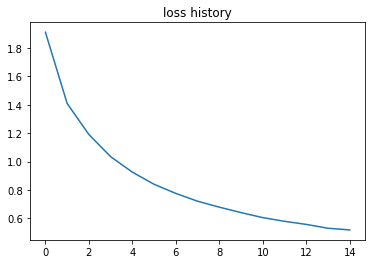

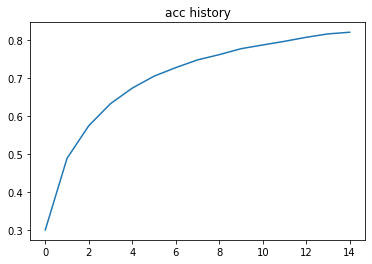

In [24]:
plt.plot(hist.history['loss'])
plt.title("loss history")
plt.show()

plt.plot(hist.history['accuracy'])
plt.title("acc history")
plt.show()